# SLO Twitter Data Analysis  - Language Statistics

Setup the Jupyter Notebook kernel for SLO data analysis.

In [1]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-7-14-19-with-irrelevant-tweets-included.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):



This section of our data analysis currently covers a comparison of Twitter API language detection versus spaCy language detection.



## "spaCy-langdetect" Language Detection Python Package:


This is a pivot table shows a comparison of the language of the Tweet as specified by the Twitter language field  (row "en"; total: 642616) versus the "spaCy" natural language processing library, "lang-detect" library, and "spacy-langdetect" library (column "en"; total: 646493). We accept as English any tweet marked as such by either Twitter or SpaCy.



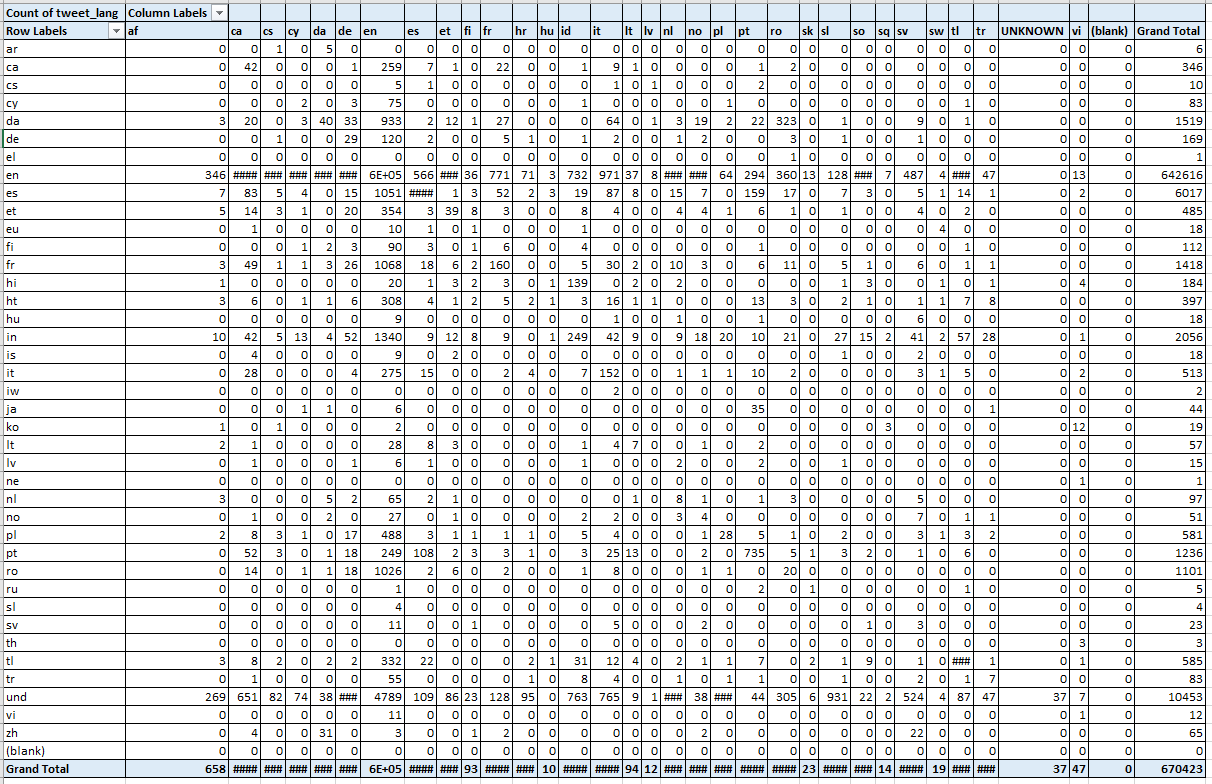

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = "../images/"
Image(filename = PATH + "spacy_versus_twitter_lang-pivot_table.png", width=1024, height=768)


"spaCy" and "lang-detect" seem to do a comparable job to the Twitter API in identifying the correct language of the Tweet.  We originally used the "polyglot" library for language detection but as we are currently working on a Windows workstation we are having difficulty getting "polyglot" to function.<br>



## English and Non-English Tweet Counts:

In [2]:
    english_spacy = tweet_dataframe.loc[tweet_dataframe["spaCy_language_detect_all_tweets"] == "en"]
    non_english_spacy = tweet_dataframe.loc[tweet_dataframe["spaCy_language_detect_all_tweets"] != "en"]

    english_twitter = tweet_dataframe.loc[tweet_dataframe["tweet_lang"] == "en"]
    non_english_twitter = tweet_dataframe.loc[tweet_dataframe["tweet_lang"] != "en"]

    english_spacy_and_twitter = tweet_dataframe.loc[(tweet_dataframe["spaCy_language_detect_all_tweets"] == "en") &
                                                    (tweet_dataframe["tweet_lang"] == "en")]
    non_english_spacy_and_twitter = tweet_dataframe.loc[(tweet_dataframe["spaCy_language_detect_all_tweets"] != "en") &
                                                        (tweet_dataframe["tweet_lang"] != "en")]

    english_spacy_or_twitter = tweet_dataframe.loc[(tweet_dataframe["spaCy_language_detect_all_tweets"] == "en") |
                                                   (tweet_dataframe["tweet_lang"] == "en")]
    non_english_spacy_or_twitter = tweet_dataframe.loc[(tweet_dataframe["spaCy_language_detect_all_tweets"] != "en") |
                                                       (tweet_dataframe["tweet_lang"] != "en")]

    print(f"# of English Tweets as determined by spaCy: {english_spacy.shape[0]}")
    print(f"# of non-English Tweets as determined by spaCy: {non_english_spacy.shape[0]}\n")

    print(f"# of English Tweets as determined by Twitter API: {english_twitter.shape[0]}")
    print(f"# of non-English Tweets as determined by Twitter API: {non_english_twitter.shape[0]}\n")

    print(f"# of English Tweets as agreed upon by spaCy AND Twitter API: {english_spacy_and_twitter.shape[0]}")
    print(
        f"# of non-English Tweets as agreed upon by spaCy AND Twitter API: {non_english_spacy_and_twitter.shape[0]}\n")

    print(f"# of English Tweets as agreed upon by spaCy OR Twitter API: {english_spacy_or_twitter.shape[0]}")
    print(f"# of non-English Tweets as agreed upon by spaCy OR Twitter API: {non_english_spacy_or_twitter.shape[0]}\n")

    print(f"Percentage of English Tweets in dataset as determined by spaCy is "
          f"{english_spacy.shape[0] / tweet_dataframe.shape[0] * 100.0}")
    print(f"Percentage of non-English Tweets in dataset as determined by spaCy is "
          f"{non_english_spacy.shape[0] / tweet_dataframe.shape[0] * 100.0}\n")

    print(f"Percentage of English Tweets in dataset as determined by Twitter API is "
          f"{english_twitter.shape[0] / tweet_dataframe.shape[0] * 100.0}")
    print(f"Percentage of non-English Tweets in dataset as determined by Twitter API is "
          f"{non_english_twitter.shape[0] / tweet_dataframe.shape[0] * 100.0}\n")

    print(f"Percentage of English Tweets in dataset as agreed upon by spaCy AND Twitter API is "
          f"{english_spacy_and_twitter.shape[0] / tweet_dataframe.shape[0] * 100.0}")
    print(f"Percentage of non-English Tweets in dataset as agreed upon by spaCy AND Twitter API is "
          f"{non_english_spacy_and_twitter.shape[0] / tweet_dataframe.shape[0] * 100.0}\n")

    print(f"Percentage of English Tweets in dataset as agreed upon by spaCy OR Twitter API is "
          f"{english_spacy_or_twitter.shape[0] / tweet_dataframe.shape[0] * 100.0}")
    print(f"Percentage of non-English Tweets in dataset as agreed upon by spaCy OR Twitter API is "
          f"{non_english_spacy_or_twitter.shape[0] / tweet_dataframe.shape[0] * 100.0}\n")

# of English Tweets as determined by spaCy: 646527
# of non-English Tweets as determined by spaCy: 23896

# of English Tweets as determined by Twitter API: 642616
# of non-English Tweets as determined by Twitter API: 27807

# of English Tweets as agreed upon by spaCy AND Twitter API: 633498
# of non-English Tweets as agreed upon by spaCy AND Twitter API: 14778

# of English Tweets as agreed upon by spaCy OR Twitter API: 655645
# of non-English Tweets as agreed upon by spaCy OR Twitter API: 36925

Percentage of English Tweets in dataset as determined by spaCy is 96.43568314332892
Percentage of non-English Tweets in dataset as determined by spaCy is 3.5643168566710868

Percentage of English Tweets in dataset as determined by Twitter API is 95.85232010238313
Percentage of non-English Tweets in dataset as determined by Twitter API is 4.147679897616878

Percentage of English Tweets in dataset as agreed upon by spaCy AND Twitter API is 94.49228323013978
Percentage of non-English Tweets in da


The "spaCy-langdetect" library does a decent job of identifying the language of the Tweet text in comparison to the Twitter API.  However, it is inferior to using "textblob", another Python library, which uses the Google Translate API to perform language detection.  Unfortunately, Google Translate is no longer free and is now a paid service.  Thus, we are forced to find free alternatives.  Based on our current results, we feel it is best that we simply drop all non-English Tweets as identified by the "spacy-langdetect" Python library.<br>


